In [95]:
!pip install control

In [96]:
import matplotlib.pyplot as plt # Para graficar
from control.matlab import * # importa las funciones de la librería usando compatibilidad de nombres de Matlab
import numpy as np

In [97]:
# suponemos que el líder avanza con velocidad constante:
G=tf([1],[1,-1],True)
G

TransferFunction(array([1]), array([ 1, -1]), True)

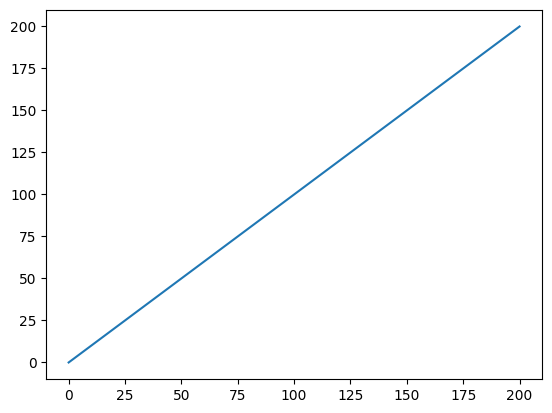

In [98]:
y0,t = step(G,200)
plt.plot(t,y0)

In [99]:
# controlador local en cada vehículo
h=3.2 # caso que funciona "bien" según paper
K = tf([1.35/(1+h), 0],[1, 0.89],True)*tf([1],[1,-1],True) # controlador local (K en el paper?)
H = tf([1+h],[1],True)-tf([h],[1,0],True)
T = minreal(K*G/(1+K*G*H))
T

4 states have been removed from the model


TransferFunction(array([0.32142857, 0.        ]), array([ 1.        , -1.11      ,  0.57      , -0.13857143]), True)

## Caso sin pérdida de datos

In [100]:
# la posición de los siguientes vehículos se puede obtener con lsim, que es como usar ct.forced_response.
# Note que la entrada a "T" es la posición del vehículo anterior. ¿Qué pasa si ahora se pierde a veces?
y=np.zeros((20,len(t)))
y[0,:]=y0
for i in range(1,20):
    y[i,:] = lsim(ss(T), y[i-1,:],t)[0]
y

array([[  0. ,   1. ,   2. , ..., 198. , 199. , 200. ],
       [  0. ,   0. ,   0. , ..., 194.8, 195.8, 196.8],
       [  0. ,   0. ,   0. , ..., 191.6, 192.6, 193.6],
       ...,
       [  0. ,   0. ,   0. , ..., 143.6, 144.6, 145.6],
       [  0. ,   0. ,   0. , ..., 140.4, 141.4, 142.4],
       [  0. ,   0. ,   0. , ..., 137.2, 138.2, 139.2]])

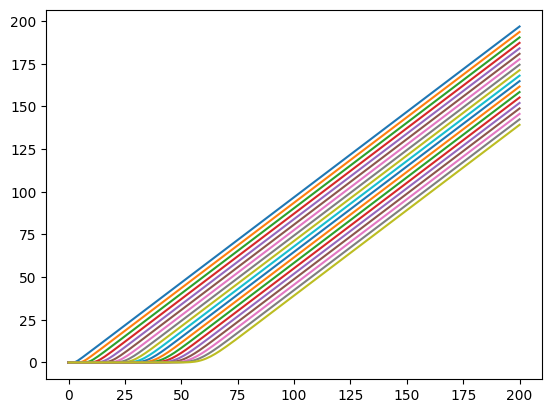

In [101]:
for i in range(1,20):
    plt.plot(t,y[i,:])

In [102]:
# velocidades
v=np.zeros((20,len(t)))
for i in range(1,20):
    for k in range(2,len(t)):
        v[i,k]=y[i,k]-y[i,k-1]
v

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

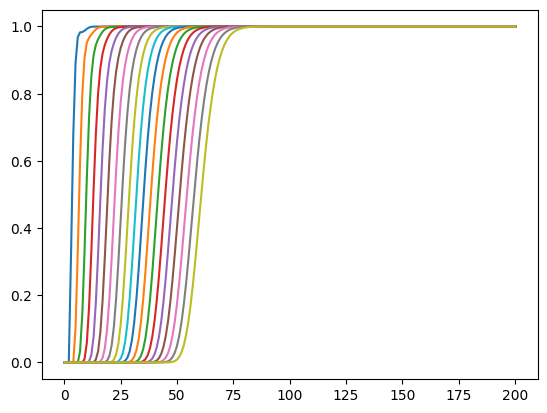

In [103]:
for i in range(1,20):
    plt.plot(t,v[i,:])

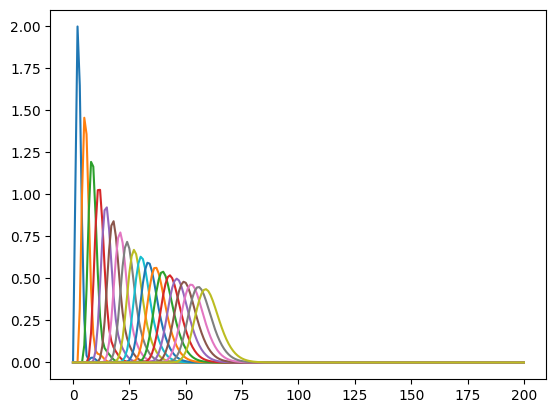

In [104]:
# graficamos los "errores". Note que si usan h=2, por ejemplo, hay problemas. La idea es que a mayor h,
# más probable que funcione todo bien, pero si hay pérdidas de datos, nos gustaría entender que pasa
for i in range(1,20):
    plt.plot(t,y[i-1,:]-y[i,:]-h*v[i,:])

## Caso con pérdida de datos

In [105]:
moneda = np.random.choice([0, 1], size=(20, 200)).tolist()

y_perdida=np.zeros((20,len(t)))
y_perdida[0,:]=y0

entrada=np.zeros((20,len(t)))
estimacion=np.zeros((20,len(t)))

for i in range(1,20):
    for j in range(2,200):
      estimacion[i-1,j] = y_perdida[i-1,j-1]+(y_perdida[i-1,j-1]-y_perdida[i-1,j-2])
      entrada[i,j] = moneda[i-1][j]*(y_perdida[i-1,j]-estimacion[i-1,j])+estimacion[i-1,j]
    y_perdida[i,:] = lsim(ss(T), entrada[i,:],t)[0]
print(y_perdida)

[[  0.    1.    2.  ... 198.  199.  200. ]
 [  0.    0.    0.  ... 194.8 195.8 196.8]
 [  0.    0.    0.  ... 191.6 192.6 193.6]
 ...
 [  0.    0.    0.  ... 143.6 144.6 145.6]
 [  0.    0.    0.  ... 140.4 141.4 142.4]
 [  0.    0.    0.  ... 137.2 138.2 139.2]]


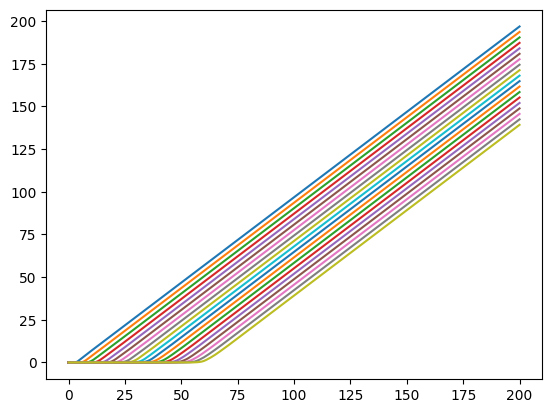

In [106]:
for i in range(1,20):
    plt.plot(t,y_perdida[i,:])

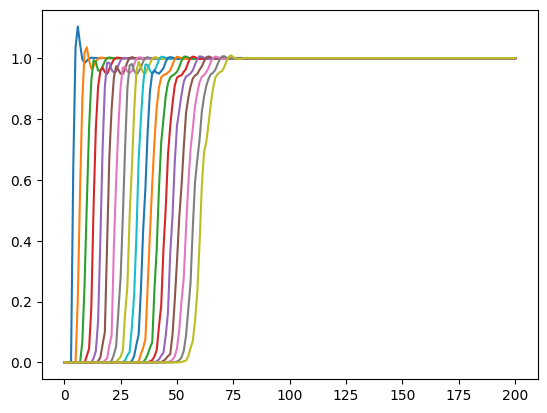

In [107]:
# velocidades
v_perdida=np.zeros((20,len(t)))
for i in range(1,20):
    for k in range(2,len(t)):
        v_perdida[i,k]=y_perdida[i,k]-y_perdida[i,k-1]
for i in range(1,20):
    plt.plot(t,v_perdida[i,:])

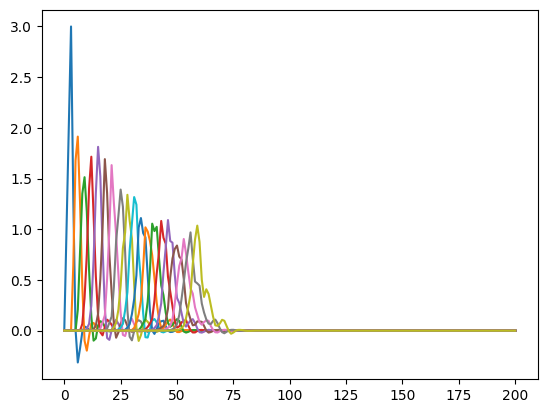

In [108]:
# graficamos los "errores". Note que si usan h=2, por ejemplo, hay problemas. La idea es que a mayor h,
# más probable que funcione todo bien, pero si hay pérdidas de datos, nos gustaría entender que pasa
for i in range(1,20):
    plt.plot(t,y_perdida[i-1,:]-y_perdida[i,:]-h*v_perdida[i,:])